- KEYWORDS: Physical Systems


# Out[47]:

## Week : Modelling Process Dynamics - Introduction



#### Physical systems description                                    :B_block:



-   Physical systems have natural manifastation that can be accknowledge based on our current experience or passed experience. 
    -   The physical system manifestations can take natural representation in the form of **mathematical model description**.
    -   The complexity of the physical phenomena which is considered is directly translated to the complexity of mathematical model representation.
    -   The mathematical model description is *usually* limiting since it can not address the physical phenomena in the wide range of physical and environmental conditions.



#### :PROPERTIES:



![img](./figuresCHE472/ditaa-sys-mod.png)

-   Modelling objective is to provide the most accurate mathematical description of underlying physical process
-   Modelying **dynamics** provides characterization of physical model as function of time
-   Implementing some type of solution to solve models in the simulation/computing environment
-   Physical process dynamics is influenced by:
    -   Initial conditions (process states at $t=0$)
    -   External input changes ($u(t)$-inputs)
    -   External input changes due to the disturbances-$d(t)$
    -   Internal changes as dynamics evolves
        
        **Definition** Process Model:- a process model consists of a set of mathematical equations that represent the physics/dynamics of the process, together with the physical parameters representing physical measurable properties.



#### :PROPERTIES:



![img](./figuresCHE472/heat-exc.jpg "Heat exchanger")



#### Process Models



-   Process Models are used for variety of reasons in the engineering practice:
    
    -   Process Design (mostly formulated at steady state but can involve transient behaviour)
    -   Process Control (steady-state gains, account for transient behaviour)
    -   Operational Training (usually accurate dynamical behaviour)
    -   Optimization (steady state and/or transients optimisation)
    
    -   Key questions to ask is:
        -   What is the most important aspect of dynamics considered in the problem you are solving - *steady states* or *transient behaviour*?
        -   Do the process variables depend significantly on process parameters in the given operating conditions
        -   Is there any randomness that can be introduce in the physical modelling and to what degree we can introduce randomness



#### Types of Models (classification)



| First Principles (fundamental) models|Empirical|
|---|---|
| Lumped|Distributed|
| Deterministic|Stochastic|

-   **Fundamental Models** 
    -   based on mechanistic modelling which is founded by <span class="underline">conservation principles of mass, momentum and energy balance</span>
    -   the first principle modelling is relatively difficult since all variables need to be defined accurately
    -   usually very complex since core of representation is given by the partial differential equations (PDEs) or ordinary differential equations (ODEs)
    -   can be usually extrapolated to different regimes of operations and can be utilized in optimization, design and control.

-   **Empirical Models** 
    -   based on the time response of the system
    -   easier to develop but requires large number of experimental realization for accurate modelling
    -   simpler representation in the form of ODEs and algebraic equations
    -   can not be extrapolated to different operating regimes of operations
    -   usually are used for control purposes only



# Out[67]:
: <matplotlib.legend.Legend at 0x1089652d0>

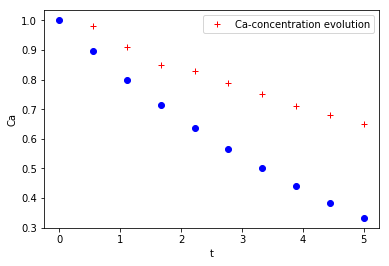

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
t = np.linspace(0, 5, 10)  # time of measurements
Ca= np.array([1.00 , 0.98, 0.91,0.85, 0.83,0.79,0.75,0.71,0.68,0.65]) # the measured concetration in the reactor
Ca1=np.array([ 1.,0.89473684,0.8,0.71428571,0.63636364,0.56521739,0.5,0.44,0.38461538,0.33333333])

plt.plot(t,Ca,'+r',t,Ca1,'bo')
plt.xlabel('t')
plt.ylabel('Ca,Ca1')
plt.legend(['Ca-concentration evolution'])

-   **Lumped** vs **Distributed Parameter Systems**
    -   *Lumped parameter systems/models*: process variables are functions of time only and systems is given usually as:
        $$\frac{dx(t)}{dt}=F(x(t),u(t)),\;\;x(0)=x_0,\;u(0)=u_0$$
        with the knowledge of function $u(t)$ for all $t\ge 0$
    -   *Distributed parameter systems/models*: process variables depend on the space and time, so spatial content is present in the form of spatial and time derivatives
        $$\begin{array}{c}\frac{\partial x(\zeta,t)}{\partial t}=F(x,\frac{x\partial x(\zeta,t)}{\partial \zeta},\frac{\partial^2 x(\zeta,t)}{\partial \zeta^2})\\Boundary\;conditions,\\x(\zeta,0)=x_0(\zeta),\;\zeta\in[0,1], t\ge 0 \end{array} $$



#### Example: Model



-   The simple mathematical model of fluid flow  system in two dimensional plane is given by the velocity vector of the fluid particle $(v_x,v_y)$, components of the velocity vector field:
    $$\begin{array}{c}\dot{v}_x=v_y\\\dot{v}_y=-v_x\end{array}$$
    
    Hence the simple autonomous fluid flow model takes the form



# Out[141]:
: <matplotlib.legend.Legend at 0x10f4ae0d0>

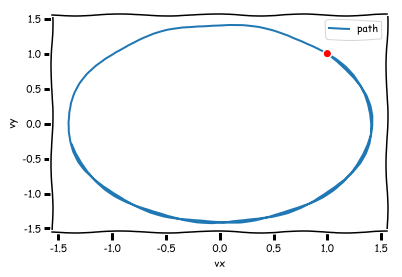

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
t=np.linspace(0,10,100)

v0=np.array([1,1])
vx=np.cos(t)*v0[0]+np.sin(t)*v0[1]
vy=-np.sin(t)*v0[0]+np.cos(t)*v0[1]
plt.plot(vx, vy,vx[0],vy[0],'ro')
plt.xlabel('vx')
plt.ylabel('vy')
plt.legend(["path"])

#### Distributed parameter systems transformation to lumped parameter systems



In the previous section we have been introduced to the basic models of the PDE system. In this section, we will look in the way to represent the PDE systems in the form that can be numerically solved. In particular, the large area of numerical mathematical analysis is devoted to the PDE systems and finding a solution to large number of different type of PDEs which describe physically relevant phenomena. Having this in mind, we will just introduce simple method that allow   us to reduce a PDE from its setting to reduced (finite dimensional) setting where standard numerical techniques can be utilized.



#### Finite Difference Method



-   Finite difference method is one of the first choices of spatial discretization methods when it comes to the modelling of the PDEs. In particular, the method is handy when it is applied to the large class of PDE models in 1 dimension (D). For example,
    
    $$\frac{\partial T}{\partial t }=\frac{\partial^2 T}{\partial \zeta^2 }$$
    
    is easily transformed to the system of linear equations by applying approximation of the second spatial derivative with finite difference scheme,
    
    $$\frac{\partial^2 T}{\partial \zeta^2 }\approx  =\frac{T(i+1,t)-2T(i,t)+T(i-1,t)}{\triangle \zeta^2}$$
    
    which yields the system of linear equations that is parameterized with the number of spatially distributed nodal points between $\zeta \in [0,1]$ with spatial increment  $\triangle \zeta$. Finally, this leads to the following,
    
    $$\frac{d T(i,t)}{d t }=\frac{T(i+1,t)-2T(i,t)+T(i-1,t)}{\triangle \zeta^2}$$
    
    -   Where $i$ at boundaries have to be carefully chosen and it depends on the type of boundary conditions imposed. For example, if we consider a Derichlet boundary conditions (that is $T(0,t)=0=T(1,t)$), and  the simple explicit time discretization (Euler discretization) of the 1st order accuracy, one obtains the following system of equations,
        
        $$\frac{ T(i,j+1)-T(i,j)}{\triangle t }=\frac{T(i+1,j)-2T(i,j)+T(i-1,j)}{\triangle \zeta^2}$$
        
        which is given as simple mapping of vector of states (denoted as the PDE state at points $i$at time $j$  to the next time instance $j+1$
        
        $$\left[ \begin{array}{c}T(1,j+1)\\T(2,j+1)\\\cdot \\ \cdot\\ T(n,j+1) \end{array}\right]=\left(I+\frac{\triangle t}{\triangle \zeta^2}\left[\begin{array}{ccccccc} -2 & 1 & 0& \cdot& \cdot& 0\\1 & -2 & 1& \cdot& \cdot& 0 \\ 0 & 1 & -2 &1  & \cdot& 0\\  0 & \cdot & \cdot&\cdot & \cdot& 0 \\  0& \cdot &\cdot & 0 & 1&-2 \end{array}\right]\right) \left[ \begin{array}{c}T(1,j)\\T(2,j)\\\cdot \\ \cdot\\ T(n,j) \end{array}\right]\label{step1}\tag{10}$$
    
    -   It is obvious that the above integration of the PDE can be easily implemented in the computer. However, one has to be careful with thebessential features of this time stepper since it is known that this numerical integration is unstable if eigenvalues of above matrix are larger then 1, as it can be seen the spatial and time discretization will influence the stability of this integrator.
    -   Although, this mathematical representation of the PDE by finite difference method leads to the finite dimensional (reduce) order representations, one can almost always realize it and it is useful tool for the insight in the PDE time evolution. On the other hand, the obtained model provides only insight in the evolution of the PDE state at the  space discretization points and we can not say anything about PDE behaviour between points. Moreover, when it comes to the more complex geometries the finite difference method will fail to preserve the PDE system characteristics and usually the way to go is to employe the finite element method (FEM) which is powerful and most reliable numerical realization of PDEs on nontrivial geometries.



#### Hyperbolic PDE system - Finite difference method



-   When it comes to the case of transport-hyperbolic PDE which model large number of chemical systems, and in particularly 1st order hyperbolic PDE one needs to be more careful with the type of the finite difference discretization that is applied in the realization of the numerical scheme. Namely, if we take the upwind or forward difference to approximate a spatial derivative, that is
    
    $$\frac{d Ca}{d\zeta}\approx \frac{Ca(i+1,\tau)-Ca(i,\tau)}{\triangle \zeta}$$
    
    will not be suitable for integration.
    
    -   In particular, we want to emphasize in this particular finite difference realization that the backward finite difference is enforced
        
        $$\frac{\partial Ca}{\partial t }= -v\frac{\partial Ca}{\partial \zeta}+k(\zeta)Ca(\zeta)$$
        
        which is spatially discretized with $\frac{d Ca}{d\zeta}\approx \frac{Ca(i,t)-Ca(i-1,t)}{\triangle \zeta}$, so that the finally after applying explicit time integration of the Euler type the expression becomes:
        
        $$\frac{d Ca(i,t)}{d t }= -v\frac{Ca(i,t)-Ca(i-1,t)}{\triangle \zeta}+k(\triangle \zeta i)Ca(i,t)$$
        
        where we relaxed notation by taking $Ca(\triangle \zeta i,t)=Ca( i,t)$ and evaluating the function $k(\zeta)$ as $k(\triangle \zeta i)$ at spatially equidistant points that span domain of PDE. This finally becomes,
        
        $$Ca(i,j+1)= Ca(i,j) +\triangle t \left[-v\frac{Ca(i,j)-Ca(i-1,j)}{\triangle \zeta}+k(\triangle \zeta i)Ca(i,j)\right]$$
    
    -   This can be implemented in any language but we are looking how to implement this in python



# Out[69]:

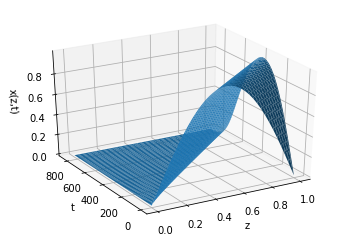

In [1]:
import numpy                    #here we load numpy
import matplotlib.pyplot as plt #here we load matplotlib
import time, sys                #and load some utilities
from math import pi
# Let us define a space of grid point evenly distributed in domain
l= 1.0      #domains length
nx = 100  # number of nodal points
dx = l/(nx)
nt = 835    #nt is the number of steps for the time loop 
dt = .001  #dt is the amount of time at step (delta t)
v = 1.5      #assume wavespeed of v = 1
k=0        # we assume for the simple case that k=0
z=numpy.arange(0,(l+dx),dx)
x=numpy.sin(z*pi)
XX=numpy.zeros((nt,nx+1))

for n in range(nt):  #loop for values of n from 0 to nt, so it will run nt times
      X = x.copy()    ##copy the existing values of x into X
      for i in range(1,nx+1): ## you can try commenting this line and...
			    #for i in range(nx): ## ... uncommenting this line and see what happens!
          x[i] = X[i]- v*dt/dx*(X[i]-X[i-1])
          XX[n][i]=x[i]

from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax = fig.gca(projection='3d')
ax.set_ylabel('t')
ax.set_xlabel('z')
ax.set_zlabel('x(z,t)')
ax.view_init(30,240)
Y=numpy.arange(0,nt)
X, Y=numpy.meshgrid(z,Y)
surf = ax.plot_surface(X,Y,XX)

#plt.savefig('py-fig2.png')
plt.show()
#return 'py-fig2.png'

#### Summary



You should get comfortable with

-   Coding simple exercise
-   Determing the model type and properties
-   Being able to identify inputs, outputs and disturbances in the model
-   Transform from distributed parameter system to lumped by finite difference method

